In [10]:
!pip install pandas matplotlib seaborn scikit-learn

zsh:1: command not found: pip


In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
sns.set(style="whitegrid")


# Load Data 

In [2]:
df = pd.read_csv('insurance.csv')


## View Data


In [3]:


display(df.head())
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nBasic stats:")
display(df.describe())


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Basic stats:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# charges distribution


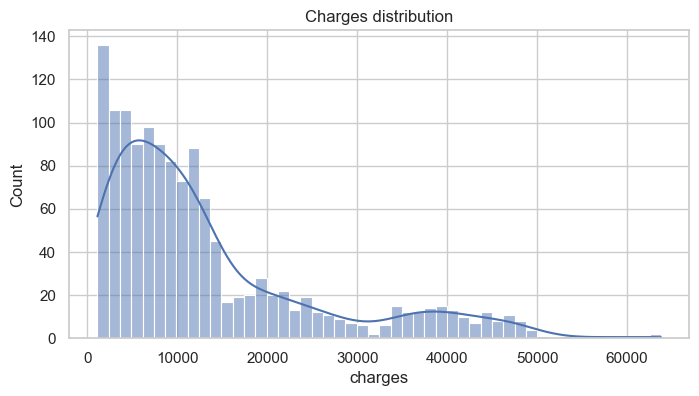

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Charges distribution')
plt.show()


# smoker vs charges boxplot


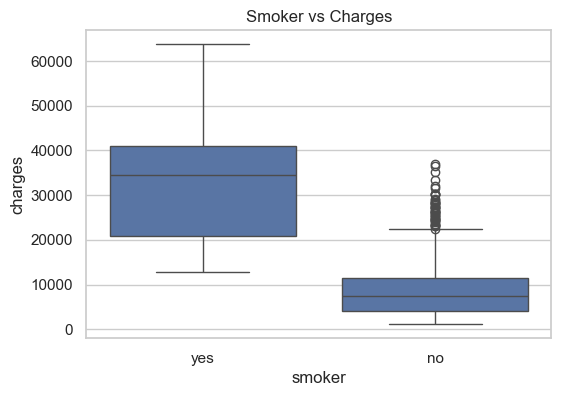

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()


# age vs charges scatter


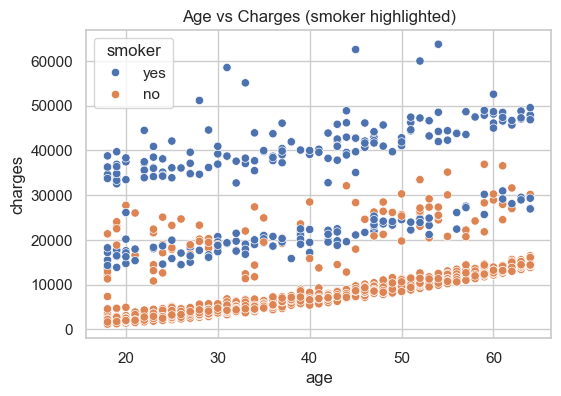

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges (smoker highlighted)')
plt.show()


# correlation heatmap for numeric cols


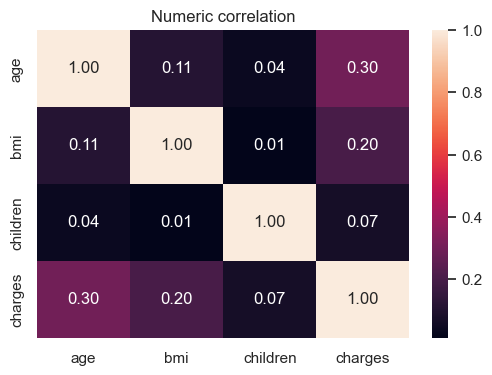

In [7]:
num_cols = ['age','bmi','children','charges']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
plt.title('Numeric correlation')
plt.show()


# Check and drop duplicates


In [8]:
print("Before duplicates:", len(df))
df = df.drop_duplicates()
print("After duplicates:", len(df))

Before duplicates: 1338
After duplicates: 1337


# Check if rare categories need to be consolidated if they are too few


In [9]:
print(df['region'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64


X and Y defined

In [10]:
X = df.drop('charges', axis=1)
y = df['charges']


### Split Dataset

This code uses train_test_split to divide the features (X) and target (y) data into training and testing sets. 70% of the data is used for training and 30% for testing. Using random_state=42 ensures that the data is split the same way every time

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### 1. `pd.get_dummies(X_train, drop_first=True)`
- Categorical columns in the X_train dataset are being one-hot encoded.
- drop_first=True is used to drop the first category (to avoid dummy variable trap).

### 2. `pd.get_dummies(X_test, drop_first=True)`
- Similarly, categorical columns in the X_test dataset are also being one-hot encoded.

### 3. `X_test = X_test.reindex(columns=X_train.columns, fill_value=0)`
- The columns of X_train and X_test may not be equal (because some categories exist in train data but not in test data, or vice versa).
- Therefore, the columns of X_test are being reindexed according to X_train.columns.
- Columns that don't exist in X_test are being filled with fill_value=0.
- As a result, the feature columns of 'X_train' and X_test become the same, which is very important for model training and prediction.

In [12]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


### 1. pd.get_dummies(X_train, drop_first=True)
Categorical columns in the X_train dataset are being one-hot encoded.
drop_first=True is used to drop the first category (to avoid dummy variable trap).
### 2. pd.get_dummies(X_test, drop_first=True)
Similarly, categorical columns in the X_test dataset are also being one-hot encoded.
### 3. X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
The columns of X_train and X_test may not be equal (because some categories exist in train data but not in test data, or vice versa).
Therefore, the columns of X_test are being reindexed according to X_train.columns.
Columns that don't exist in X_test are being filled with fill_value=0.
As a result, the feature columns of X_train and X_test become the same, which is very important for model training and prediction.


In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## MSE, RMSE 

## 📊 Model Performance Metrics
1. RMSE (Root Mean Squared Error)
RMSE means the average error between the actual value and the predicted value.
It squares all the errors, then calculates the average, and finally takes the square root (√).
The smaller the value, the better the model is predicting.
Example:
RMSE = 100 means there is approximately 100 units of error in the prediction on average.
2. R² Score (Coefficient of Determination)
R² score tells us how well the model can explain the variance (variability) of the actual data.
Its value ranges from 0 to 1 (sometimes it can be negative):
R² = 1.0 → A perfect model
R² = 0.0 → The model hasn't learned anything (equivalent to baseline)
R² < 0 → The model is predicting randomly
✅ In Summary
RMSE → How much the prediction is wrong (amount of error).
R² → How well the model explains the actual data.


In [ ]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 4831.968303853348
R2 Score: 0.8635563908339643


# Feature importance 
# Features Name
# Create DataFrame

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

importance = model.feature_importances_

features = X_train.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

print(feat_importance)

            Feature  Importance
4        smoker_yes    0.605774
1               bmi    0.209142
0               age    0.140701
2          children    0.021733
3          sex_male    0.006875
6  region_southeast    0.006527
5  region_northwest    0.005552
7  region_southwest    0.003695


 # Show most important at the top

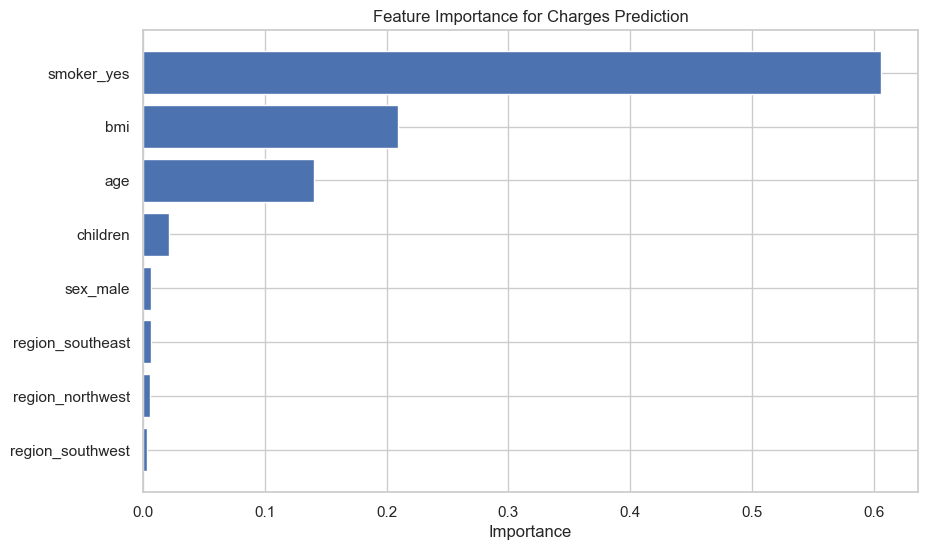

In [17]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis() 
plt.xlabel('Importance')
plt.title('Feature Importance for Charges Prediction')
plt.show()


In [18]:
import joblib


joblib.dump(model, 'full_charges_model.pkl')


['full_charges_model.pkl']